In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import json
import torch
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pgf import FigureCanvasPgf
from matplotlib import pyplot as plt
%matplotlib inline

import tsvar
tsvar.plotting.set_neurips_matplotib_rcparams()

In [3]:
EXP_DIR = "../output/dataRegimes-n10-2"
output_df = tsvar.plotting.load_outputs(exp_dir=EXP_DIR)
cols = [col for col in output_df.columns if col.startswith('mle')]

Process file: ../output/dataRegimes-n10-2/1590694516-g04-d10-n020000/output-03.json...


In [4]:
def build_Id(row):
    return os.path.join(os.path.split(row['expId'])[1], row['outputIdx'])
output_df['Id'] = output_df.apply(build_Id, axis=1)

print(output_df.shape)
output_df.head()

(200, 39)


,mle_baseline,mle_beta,mle_adjacency,mle_conv,mle_history,mle_num_iter,bbvi_loc,bbvi_log_scale,bbvi_coeffs_mean,bbvi_coeffs_mode,...,outputIdx,dim_o,baseline,beta,adjacency,dim,max_jumps,sim_seed_list,gen_seed,Id
0,"[0.07302222731504364, 0.07574182906571225, 0.5...","[[2.211221535119643, 2.1587185952395034, 1.366...","[[1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",1700,"[-1.8910086154937744, -1.3716388940811157, -2....","[-1.7918965816497803, -2.2025673389434814, -1....","[0.15302965776685973, 0.2552449355072055, 0.08...","[0.14678611129873695, 0.2506109968581736, 0.08...",...,output-00.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-00.json
1,"[0.5145425079849086, 0.5107136552256204, 0.512...","[[1.4130525509934466, 1.5885541222803308, 1.70...","[[1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",1100,"[-2.7304489612579346, -1.4684937000274658, -2....","[-1.2899280786514282, -2.06308650970459, -1.73...","[0.06770762277062128, 0.23213842466147533, 0.1...","[0.06043215998850481, 0.2265842937085948, 0.10...",...,output-01.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-01.json
2,"[0.514567932543949, 0.5152714143600883, 0.5177...","[[50.56358061607632, 1.8308281886755517, 34.61...","[[0.5145840852451645, 1e-10, 0.517723426016006...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2400,"[-2.7092483043670654, -2.4195072650909424, -2....","[-1.5230780839920044, -1.4414854049682617, -1....","[0.06818861611912462, 0.09149022501956197, 0.0...","[0.06349528557063025, 0.0841229794539788, 0.08...",...,output-02.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-02.json
3,"[0.09263000580779752, 0.5145351768247899, 0.51...","[[2.9525558138339676, 2.2052653219304537, 1.59...","[[1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 1e-10, 0....",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",2000,"[-2.010283946990967, -1.5263357162475586, -2.4...","[-1.6783628463745117, -2.091539144515991, -1.5...","[0.1363051226479581, 0.2189942132843795, 0.088...","[0.12936296722438329, 0.21404110499373397, 0.0...",...,output-03.json,10,"[0.0218, 0.0426, 0.0395, 0.0185, 0.0177, 0.028...","[[0.1127, 0.7645, 0.7884, 0.5467, 0.1643, 0.88...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.1028, 0.0, 0.0, 0...",10,499,"[1292189582, 1768220829, 1953951279, 266890044]",408297183,1590694496-g00-d10-n000499/output-03.json
4,"[0.5153948620596939, 0.1113193505001733, 0.511...","[[1.865082851816161, 1e-10, 40.047113501619855...","[[1e-10, 0.04203069024254374, 0.51186911344416...",True,"{'iter': [100, 200, 300, 400, 500, 600, 700, 8...",1900,"[-1.8268916606903076, -1.617118239402771, -1.7...","[-1.9387288093566895, -1.7751957178115845, -1....","[0.16258733692922053, 0.20133974173767596, 0.1...","[0.15761576813573444, 0.19285211305316996, 0.1...",...,output-00.json,10,"[0.0283, 0.0132, 0.0472, 0.0484, 0.0471, 0.031...","[[0.8116, 0.165, 0.5225, 0.412, 0.9752, 0.3192...","[[0.0, 0.1667, 0.1796, 0.1097, 0.1372, 0.0, 0....",10,499,"[857735694, 1018385563, 1295093419, 656948719]",564435282,1590694496-g01-d10-n000499/output-00.json


---

In [5]:
suf_col_dict = {
    'mle': 'mle_adjacency', 
    
    #'bbvi': 'bbvi_adj_mean', 
    'bbvi': 'bbvi_adj_mode',
    
    #'vi': 'vi_adj_mean',
    'vi': 'vi_adj_mode',
    
    #'vi_fixed_beta_mean': 'vi_fixed_beta_adj_mean',
    #'vi_fixed_beta_mode': 'vi_fixed_beta_adj_mode',
    
    'gb': 'gb_adj_normed',
}

plot_df = tsvar.plotting.make_plot_df(output_df, suf_col_dict, agg_col='max_jumps', threshold=0.05)
plot_df

acc_mle                               acc_bbvi                                ... fn_vi                            fn_gb                           
              min   max    mean       std count      min   max    mean       std count  ...   min max   mean       std count   min max   mean       std count
max_jumps                                                                               ...                                                                  
499          0.43  0.68  0.5615  0.062008    20     0.52  0.71  0.6135  0.058784    20  ...    22  39  31.30  5.371465    20    23  37  30.25  4.216197    20
753          0.50  0.66  0.5785  0.048804    20     0.47  0.73  0.6120  0.075853    20  ...    14  44  28.30  7.079251    20    21  40  30.85  5.304169    20
1134         0.52  0.71  0.6105  0.049255    20     0.63  0.82  0.7145  0.051450    20  ...    11  25  19.25  3.226127    20    22  33  27.05  3.086047    20
1709         0.50  0.72  0.6030  0.056391    20     0.65  0.81  0.7115  0.043198    20  ...    11  21  16.50  2.544344    20    23  37  27.85  3.166851    20
2576         0.51  0.86  0.6050  0.079703    20     0.57  0.86  0.7295  0.077831    20  ...     5  25  14.55  5.510516    20    23  37  28.85  3.468277    20
3881         0.55  0.76  0.6345  0.056613    20     0.80  0.94  0.8775  0.045523    20  ...     3  14   6.40  2.909151    20    11  28  20.75  4.929770    20
5848         0.51  0.93  0.6415  0.110419    20     0.79  0.97  0.9060  0.053449    20  ...     1  11   4.70  3.180533    20    14  30  21.35  3.869925    20
8810         0.49  0.95  0.6580  0.146273    20     0.89  0.98  0.9305  0.023278    20  ...     0   8   3.80  2.142306    20    14  25  19.60  2.980639    20
13274        0.50  0.97  0.6940  0.150102    20     0.88  1.00  0.9545  0.027237    20  ...     0   5   2.15  1.631112    20    10  26  17.80  4.098780    20
20000        0.50  0.96  0.6875  0.160718    20     0.93  1.00  0.9685  0.022542    20  ...     0   4   1.25  1.482352    20    10  21  15.95  3.051747    20

[10 rows x 280 columns]

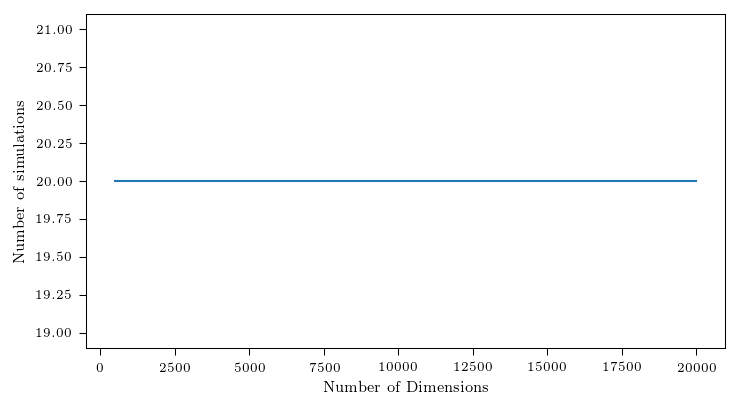

In [6]:
plt.figure()
plt.plot(plot_df.index, plot_df['acc_mle']['count'])
plt.ylabel('Number of simulations')
plt.xlabel('Number of Dimensions');

In [7]:
NEURIPS_RCPARAMS = {
    "figure.autolayout": False,         # Makes sure nothing the feature is neat & tight.
    "figure.figsize": (5.5, 2.95),      # Text width: 5.5in (double figure minus spacing 0.2in).
    "figure.dpi": 150,                  # Displays figures nicely in notebooks.
    "axes.linewidth": 0.5,              # Matplotlib's current default is 0.8.
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",             # use serif rather than sans-serif
    "font.serif": "Times New Roman",    # use "Times New Roman" as the standard font
    "font.size": 7,
    "axes.titlesize": 7,                # LaTeX default is 10pt font.
    "axes.labelsize": 7,                # LaTeX default is 10pt font.
    "legend.fontsize": 6,               # Make the legend/label fonts a little smaller
    "legend.frameon": True,             # Remove the black frame around the legend
    "patch.linewidth": 0.5,
    "xtick.labelsize": 5,
    "ytick.labelsize": 5,
    "lines.linewidth": 1.0,
    "lines.markersize": 4,
    "grid.linewidth": 0.3,
    "pgf.texsystem": "xelatex",         # use Xelatex which is TTF font aware
    "pgf.rcfonts": False,               # Use pgf.preamble, ignore standard Matplotlib RC
    "pgf.preamble": [
        r'\usepackage{fontspec}',
        r'\usepackage{unicode-math}',
        r'\setmainfont{Times New Roman}',
    ],
    'errorbar.capsize': 3.0,
}
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)
matplotlib.rcParams.update(NEURIPS_RCPARAMS)

In [13]:
plot_meta_data = [
    ('f1score',  'F1-Score',         ), 
    ('relerr',   'Relative Error',   ),
    
    ('runtime_log',  'Runtime (in min)', ),
#    ('runtime_lin',  'Runtime (in min)', ),
    
#    ('num_iter', 'Number of iterations'),
    
#    ('precAt5', 'Precision@5',     ),
    ('precAt10', 'Precision@10',     ),
#    ('precAt20', 'Precision@20',     ),
#    ('precAt50', 'Precision@50',     ),
#    ('precAt100', 'Precision@100',     ),
#    ('precAt200', 'Precision@200',     ),
]

#   (prefix, label,  color,  ls,   lw)
queries_list = [    
    ('vi',    'VI',   'C2', '-',  1.85),
    ('gb',    'GB',   'C4', '-',  1.0),
    ('bbvi',  'BBVI', 'C1', '-',  1.0), 
    ('mle',  'MLE',   'C0', '-',  1.0), 
]

for i, (prefix, ylabel) in enumerate(plot_meta_data):
    print(prefix)
    
    plt.figure(figsize=(5.5/2 - 0.2, 1.25))
    plt.grid()
    
    if prefix == 'runtime_log':
        #ax = plt.gca()
        #new_ax = plt.twinx()
        #plt.sca(new_ax)
        #plt.grid(False)
        pass
    
    for suf, label, color, ls, lw in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls, linewidth=lw,  capsize=2,
                     marker='o', markersize=2*lw)
    
    if prefix == 'runtime_log':
        #plt.yticks([], [])
        #plt.sca(ax)
        pass
    
    plt.xlabel(f'Number of training events', labelpad=0)
    plt.ylabel(ylabel, labelpad=3);
    plt.xscale('log')
    
    if prefix == 'f1score':
        #plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.legend(loc='lower right', prop={'size': 7})
        #plt.ylim(bottom=0)
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.gca().tick_params(axis='y', which='major', pad=0.5)
        plt.ylabel(ylabel, labelpad=0);
        plt.yscale('log')
        pass
        
    if prefix == 'runtime_log':
        plt.gca().yaxis.set_minor_locator(ticker.FixedLocator(
            np.log10(np.hstack([np.linspace(1, 10, 8)/i for i in [100, 10, 1, 0.1, 0.01]]))))
        plt.grid(which='both', axis='y')
        
        plt.yticks([-1, 0, 1, 2], [0.1, 1, 10, 100])
        #
        #vals = np.array([10, 50, 100, 150, 200, 250])
        #plt.plot(10 ** plot_df[col]['mean'], lw=0)
        #plt.yscale('log', basey=10, nonposy='clip')
        #plt.yticks(np.log10(vals), vals)
        #plt.gca().tick_params(axis="y",direction="in", pad=-0.1)
        #ymin, ymax = 10 ** np.array(new_ax.get_ylim())
        #plt.ylim(ymin, ymax)
        pass
        
    if prefix.startswith('prec'):
        plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        plt.ylim(bottom=0)
        
    if prefix.startswith('num_iter'):
        plt.yscale('log', basey=10, nonposy='clip');

    plt.tight_layout()
    plt.subplots_adjust(left=0.15, right=0.99, top=0.97, bottom=0.2)
    plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-{prefix}.pdf')
    plt.close()

f1score
relerr
runtime_log
precAt10


---

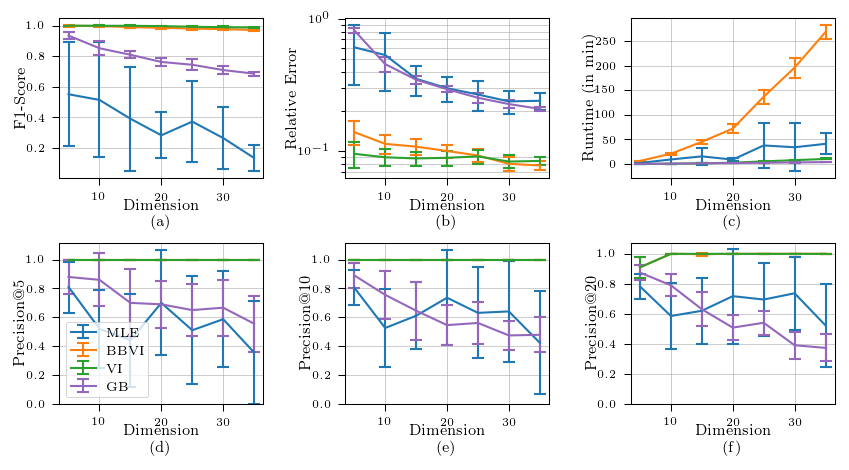

In [8]:
plot_meta_data = [
#    ('acc', 'Accuracy'),
    ('f1score',  'F1-Score',         (0, 0), '(a)'), 
    ('relerr',   'Relative Error',   (0, 1), '(b)'),
    ('runtime',  'Runtime (in min)', (0, 2), '(c)'),
    ('precAt5',  'Precision@5',      (1, 0), '(d)'),
    ('precAt10', 'Precision@10',     (1, 1), '(e)'),
    ('precAt20', 'Precision@20',     (1, 2), '(f)')
]

queries_list = [
    ('mle',                'MLE',          'C0', '-'), 
    
    ('bbvi',          'BBVI',  'C1', '-'), 
    #('bbvi_mode',          'BBVI (mode)',  'C1', ':'),
    
    ('vi',            'VI',    'C2', '-'),
    #('vi_mode',            'VI (mode)',    'C2', ':'),
    
    #('vi_fixed_beta_mean', 'VI-fb (mean)', 'C3', '-'),
    #('vi_fixed_beta_mode', 'VI-fb (mode)', 'C3', ':'),
    
    ('gb',                 'GB',           'C4', '-'),
]

fig, axs = plt.subplots(2, 3, figsize=(5.5, 1.95*1.5))

for prefix, ylabel, axIdx, numStr in plot_meta_data:
    plt.sca(axs[axIdx])
    plt.grid()
    for suf, label, color, ls in queries_list:
        col = '_'.join([prefix, suf])
        plt.errorbar(plot_df.index, plot_df[col]['mean'], yerr=plot_df[col]['std'], 
                     label=label, color=color, linestyle=ls)
    
    plt.xlabel(f'Dimension\n{numStr}', labelpad=-1)
    #plt.xscale('log')
    plt.ylabel(ylabel, labelpad=-1);
    
    if prefix == 'relerr':
        plt.grid(which='both', axis='y')
        plt.yscale('log')
        pass
        
    if prefix == 'runtime':
        #plt.yscale('log')
        pass

    if prefix == 'precAt5':
        plt.legend(loc='lower left', prop={'size': 6})
        
    if prefix.startswith('prec'):
        plt.ylim(bottom=0)

plt.subplots_adjust(left=0.05, right=0.99, top=0.98, bottom=0.1, hspace=0.4, wspace=0.4)
plt.savefig(f'/Users/trouleau/Desktop/fig-{EXP_DIR.split(os.path.sep)[-1]}-all.pdf')